<a href="https://colab.research.google.com/github/Andimuhammadfauzanagung/PW23_Fauzan_D121211094/blob/main/Komputasi%20Biomedik%2001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# %matplotlib inline



In [12]:
df = pd.read_excel('./Data Dinkes Jatim .xlsx')
df


,No,Kabupaten & Kota,JUMLAH TEMPAT TIDUR,PASIEN KELUAR (HIDUP + MATI),PASIEN KELUAR MATI,PASIEN KELUAR MATI ≥48 JAM DIRAWAT,Gross Death Rate,Net Death Rate
0,1,KAB . PACITAN,304,17211,1005,443,58.4,25.7
1,2,KAB . PONOROGO,1050,53481,3430,2045,64.1,38.2
2,3,KAB . TRENGGALEK,423,17416,1501,762,86.2,43.8
3,4,KAB . TULUNGAGUNG,1366,57258,4594,2375,80.2,41.5
4,5,KAB . BLITAR,892,32548,1481,883,45.5,27.1
5,6,KAB . KEDIRI,1389,51880,2329,2262,44.9,43.6
6,7,KAB . MALANG,2303,97072,3976,2105,41.0,21.7
7,8,KAB . LUMAJANG,904,46543,2689,1547,57.8,33.2
8,9,KAB . JEMBER,1711,87195,4175,1548,47.9,26.4
9,10,KAB . BANYUWANGI,1516,73051,4233,1549,57.9,32.4


<Axes: >

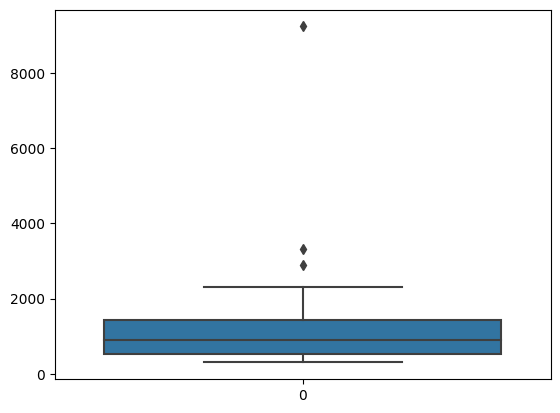

In [15]:
sns.boxplot(df['JUMLAH TEMPAT TIDUR'])

<Axes: >

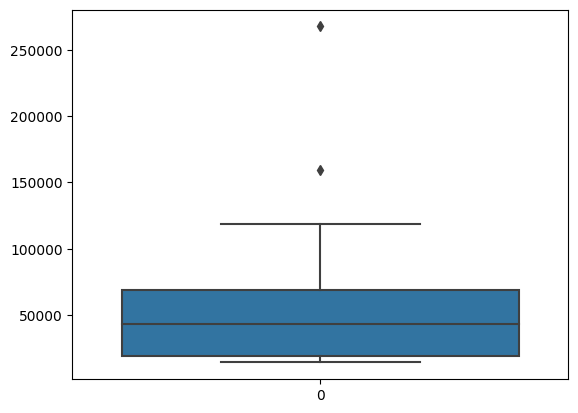

In [17]:
sns.boxplot(df['PASIEN KELUAR (HIDUP + MATI)'])

<Axes: >

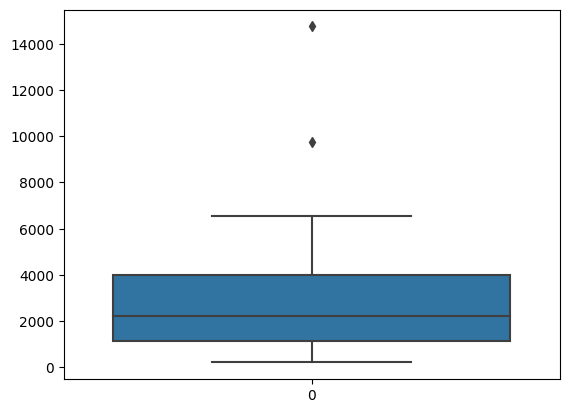

In [28]:
sns.boxplot(df['PASIEN KELUAR MATI'])

<Axes: >

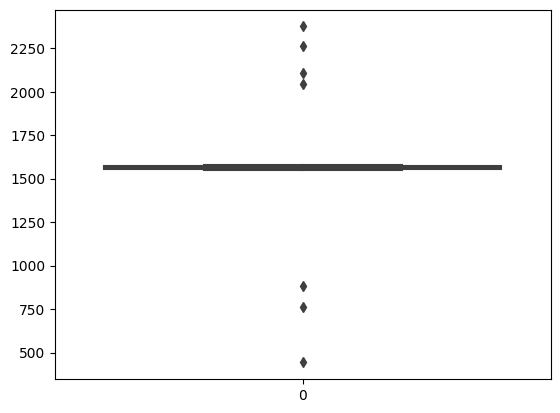

In [19]:
sns.boxplot(df['PASIEN KELUAR MATI ≥48 JAM DIRAWAT'])

<Axes: >

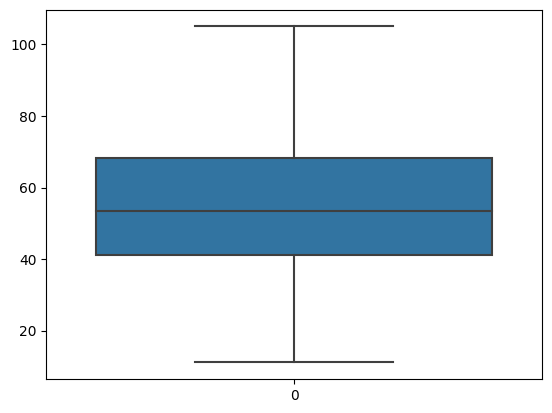

In [20]:
sns.boxplot(df['Gross Death Rate'])

<Axes: >

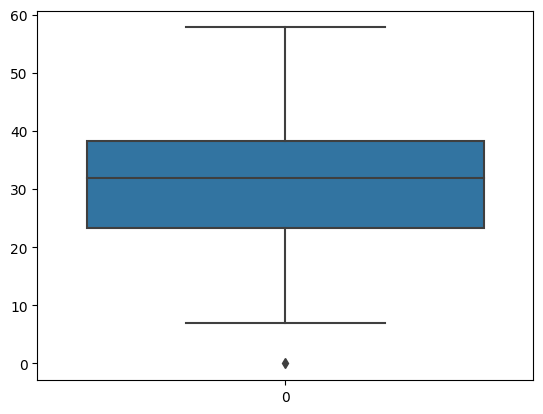

In [21]:
sns.boxplot(df['Net Death Rate'])

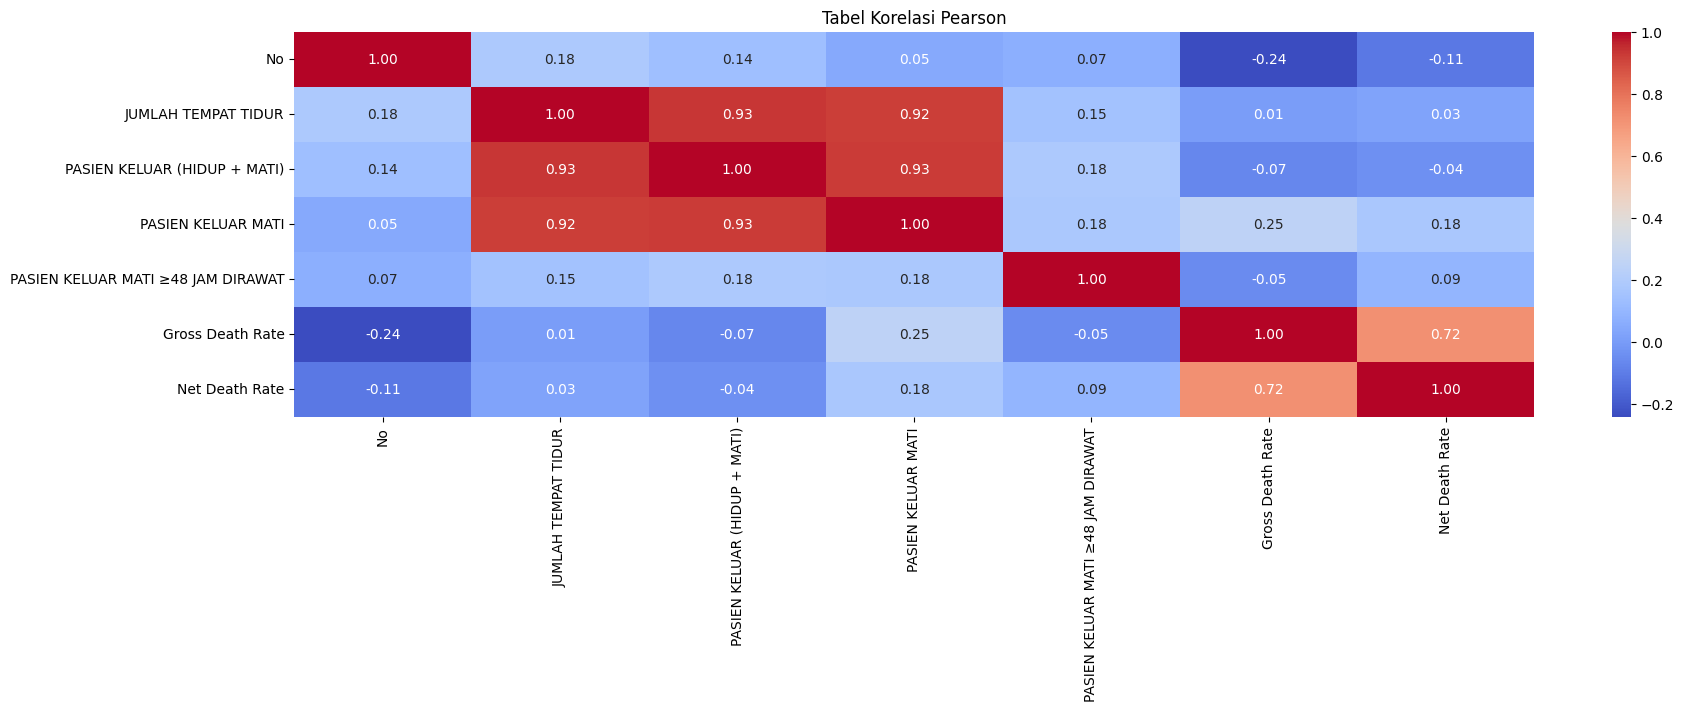

In [35]:
# Menghitung korelasi pearson
korelasi_pearson = df.corr(method='pearson', numeric_only=True)

# Membuat plot heatmap tabel korelasi
plt.figure(figsize=(20,5 ))
sns.heatmap(korelasi_pearson, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Tabel Korelasi Pearson")
plt.show()

Berdasarkan Heatmap diatas, Dari warna krem ke merah Memiliki kolerasi Lebih Besar dari 0.5 - 1, sehingga akan di lakukan regresiterhadap beberapa variabel berikut;

1.   Jumlah Tempat Tidur dengan PASIEN KELUAR (HIDUP + MATI)
2.   Jumlah Tempat Tidur dengan PASIEN KELUAR MATI
3.   PASIEN KELUAR MATI dengan PASIEN KELUAR (HIDUP + MATI)
4.   Gross death rate dengan Net death rate








R^2 JUMLAH TEMPAT TIDUR dan PASIEN KELUAR (HIDUP + MATI): 0.87
R^2 JUMLAH TEMPAT TIDUR dan PASIEN KELUAR MATI): 0.84
R^2 PASIEN KELUAR MATI dan PASIEN KELUAR (HIDUP + MATI): 0.86
R^2 Gross Death Rate dan Net Death Rate: 0.51


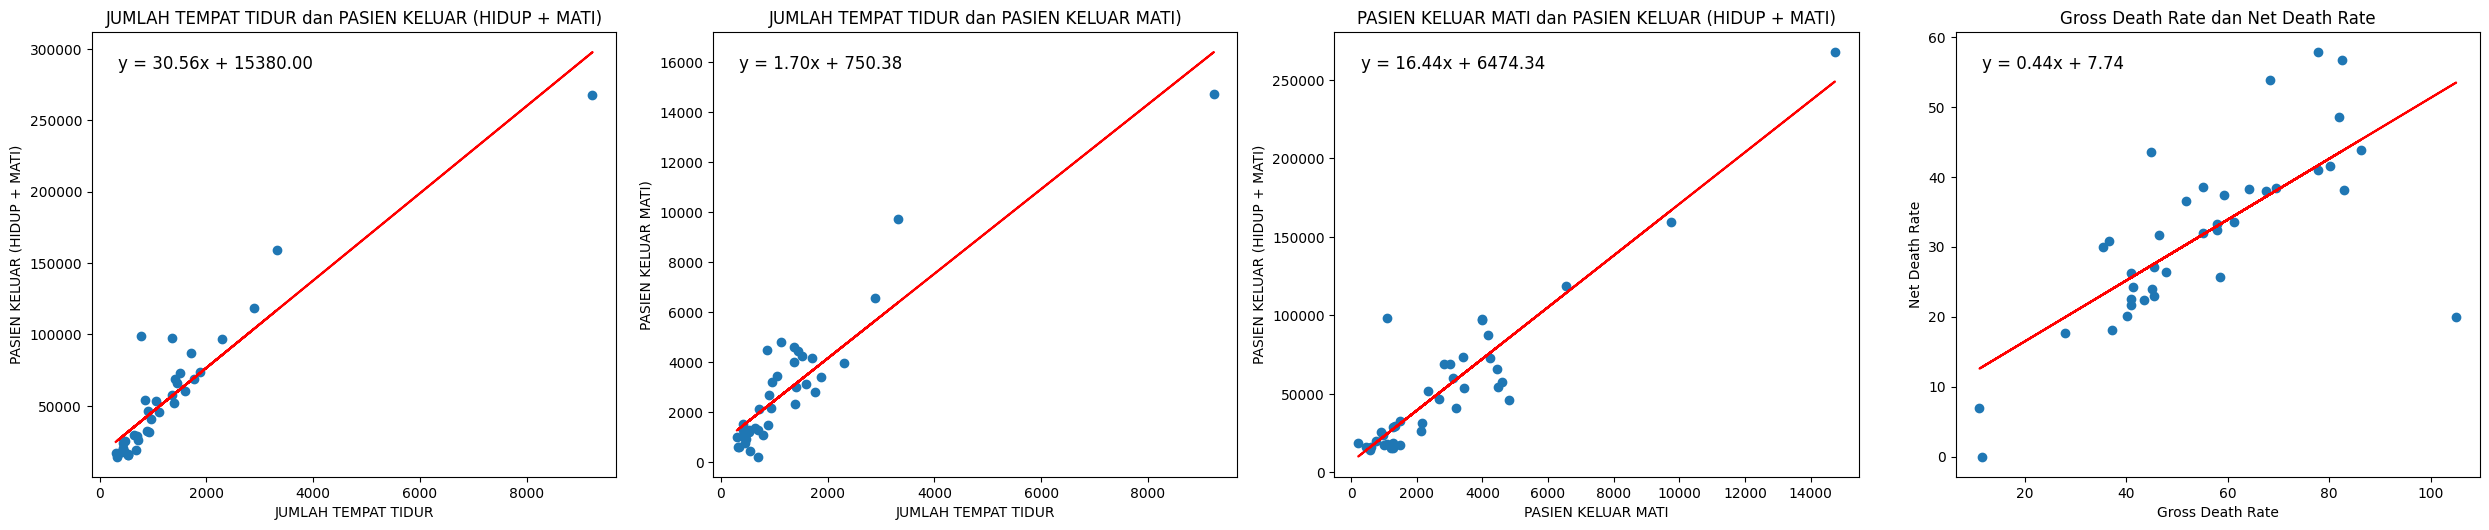

In [46]:
# Fungsi Regresi Linear dan menampilkan plot
def regli(df, x_col, y_col, label_x, label_y, position):
    X = df[x_col]
    y = df[y_col]

    kons = sm.add_constant(X)
    model = sm.OLS(y, kons).fit()
    y_pred = model.predict(kons)

    plt.subplot(2, 4, position)
    plt.scatter(X, y)
    plt.plot(X, y_pred, color='red')
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    plt.title(f"{label_x} dan {label_y}")

    # Menampilkan persamaan regresi linear
    rumus = f"y = {model.params[1]:.2f}x + {model.params[0]:.2f}"
    plt.text(0.05, 0.95, rumus, fontsize=12, ha='left', va='top', transform=plt.gca().transAxes)

    # Menghitung R^2
    r_square = model.rsquared
    print(f"R^2 {label_x} dan {label_y}: {r_square:.2f}")

    return model

# Variabel independent dan dependent
variabel = [
    ('JUMLAH TEMPAT TIDUR','PASIEN KELUAR (HIDUP + MATI)','JUMLAH TEMPAT TIDUR','PASIEN KELUAR (HIDUP + MATI)'),
     ('JUMLAH TEMPAT TIDUR', 'PASIEN KELUAR MATI','JUMLAH TEMPAT TIDUR', 'PASIEN KELUAR MATI)'),
      ('PASIEN KELUAR MATI', 'PASIEN KELUAR (HIDUP + MATI)','PASIEN KELUAR MATI', 'PASIEN KELUAR (HIDUP + MATI)'),
      ('Gross Death Rate', 'Net Death Rate','Gross Death Rate', 'Net Death Rate'),
]

plt.figure(figsize=(25, 10))
model_df = {}

# Iterasi variabel untuk melakukan regresi linear
for i, (x_col, y_col, label_x, label_y) in enumerate(variabel, 1):
    model = regli(df, x_col, y_col, label_x, label_y, i)
    model_data[f'Model {i}'] = {
        'Koefisien': model.params[1],
        'Intercept': model.params[0]
    }

plt.tight_layout()
plt.show()